Компания-производитель одежды заинтересована в том, чтобы узнать, какой сегмент или атрибуты вызывают высокие продажи.
Подход: Построить случайный лес с целевой переменной «Продажи» (сначала мы преобразуем ее в категориальную переменную), а все остальные переменные будут независимыми в анализе.

Атрибуты следующие:
* Продажи -- Единичные продажи (в тысячах) в каждом местоположении
* Цена конкурента -- Цена, взимаемая конкурентом в каждом месте
* Доход -- Уровень дохода сообщества (в тысячах долларов)
* Реклама -- Местный рекламный бюджет компании в каждом месте (в тысячах долларов)
* Население -- Численность населения в регионе (в тысячах)
* Цена -- Цены, взимаемые компанией за автокресла на каждой площадке.
* Расположение на полках в магазинах -- Фактор с уровнями Плохой, Хороший и Средний, указывающий качество расположения стеллажей для автокресел в каждом магазине.
* Возраст -- средний возраст местного населения
* Образование -- Уровень образования в каждом месте
* Город — коэффициент с уровнями «Нет» и «Да», указывающий, находится ли магазин в городе или в сельской местности.
* США -- Фактор с уровнями "Нет" и "Да", указывающий, находится ли магазин в США или за его пределами.

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [172]:
df = pd.read_csv("company_data.csv")

In [173]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [174]:
df.shape

(400, 11)

In [175]:
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1200x800 with 0 Axes>

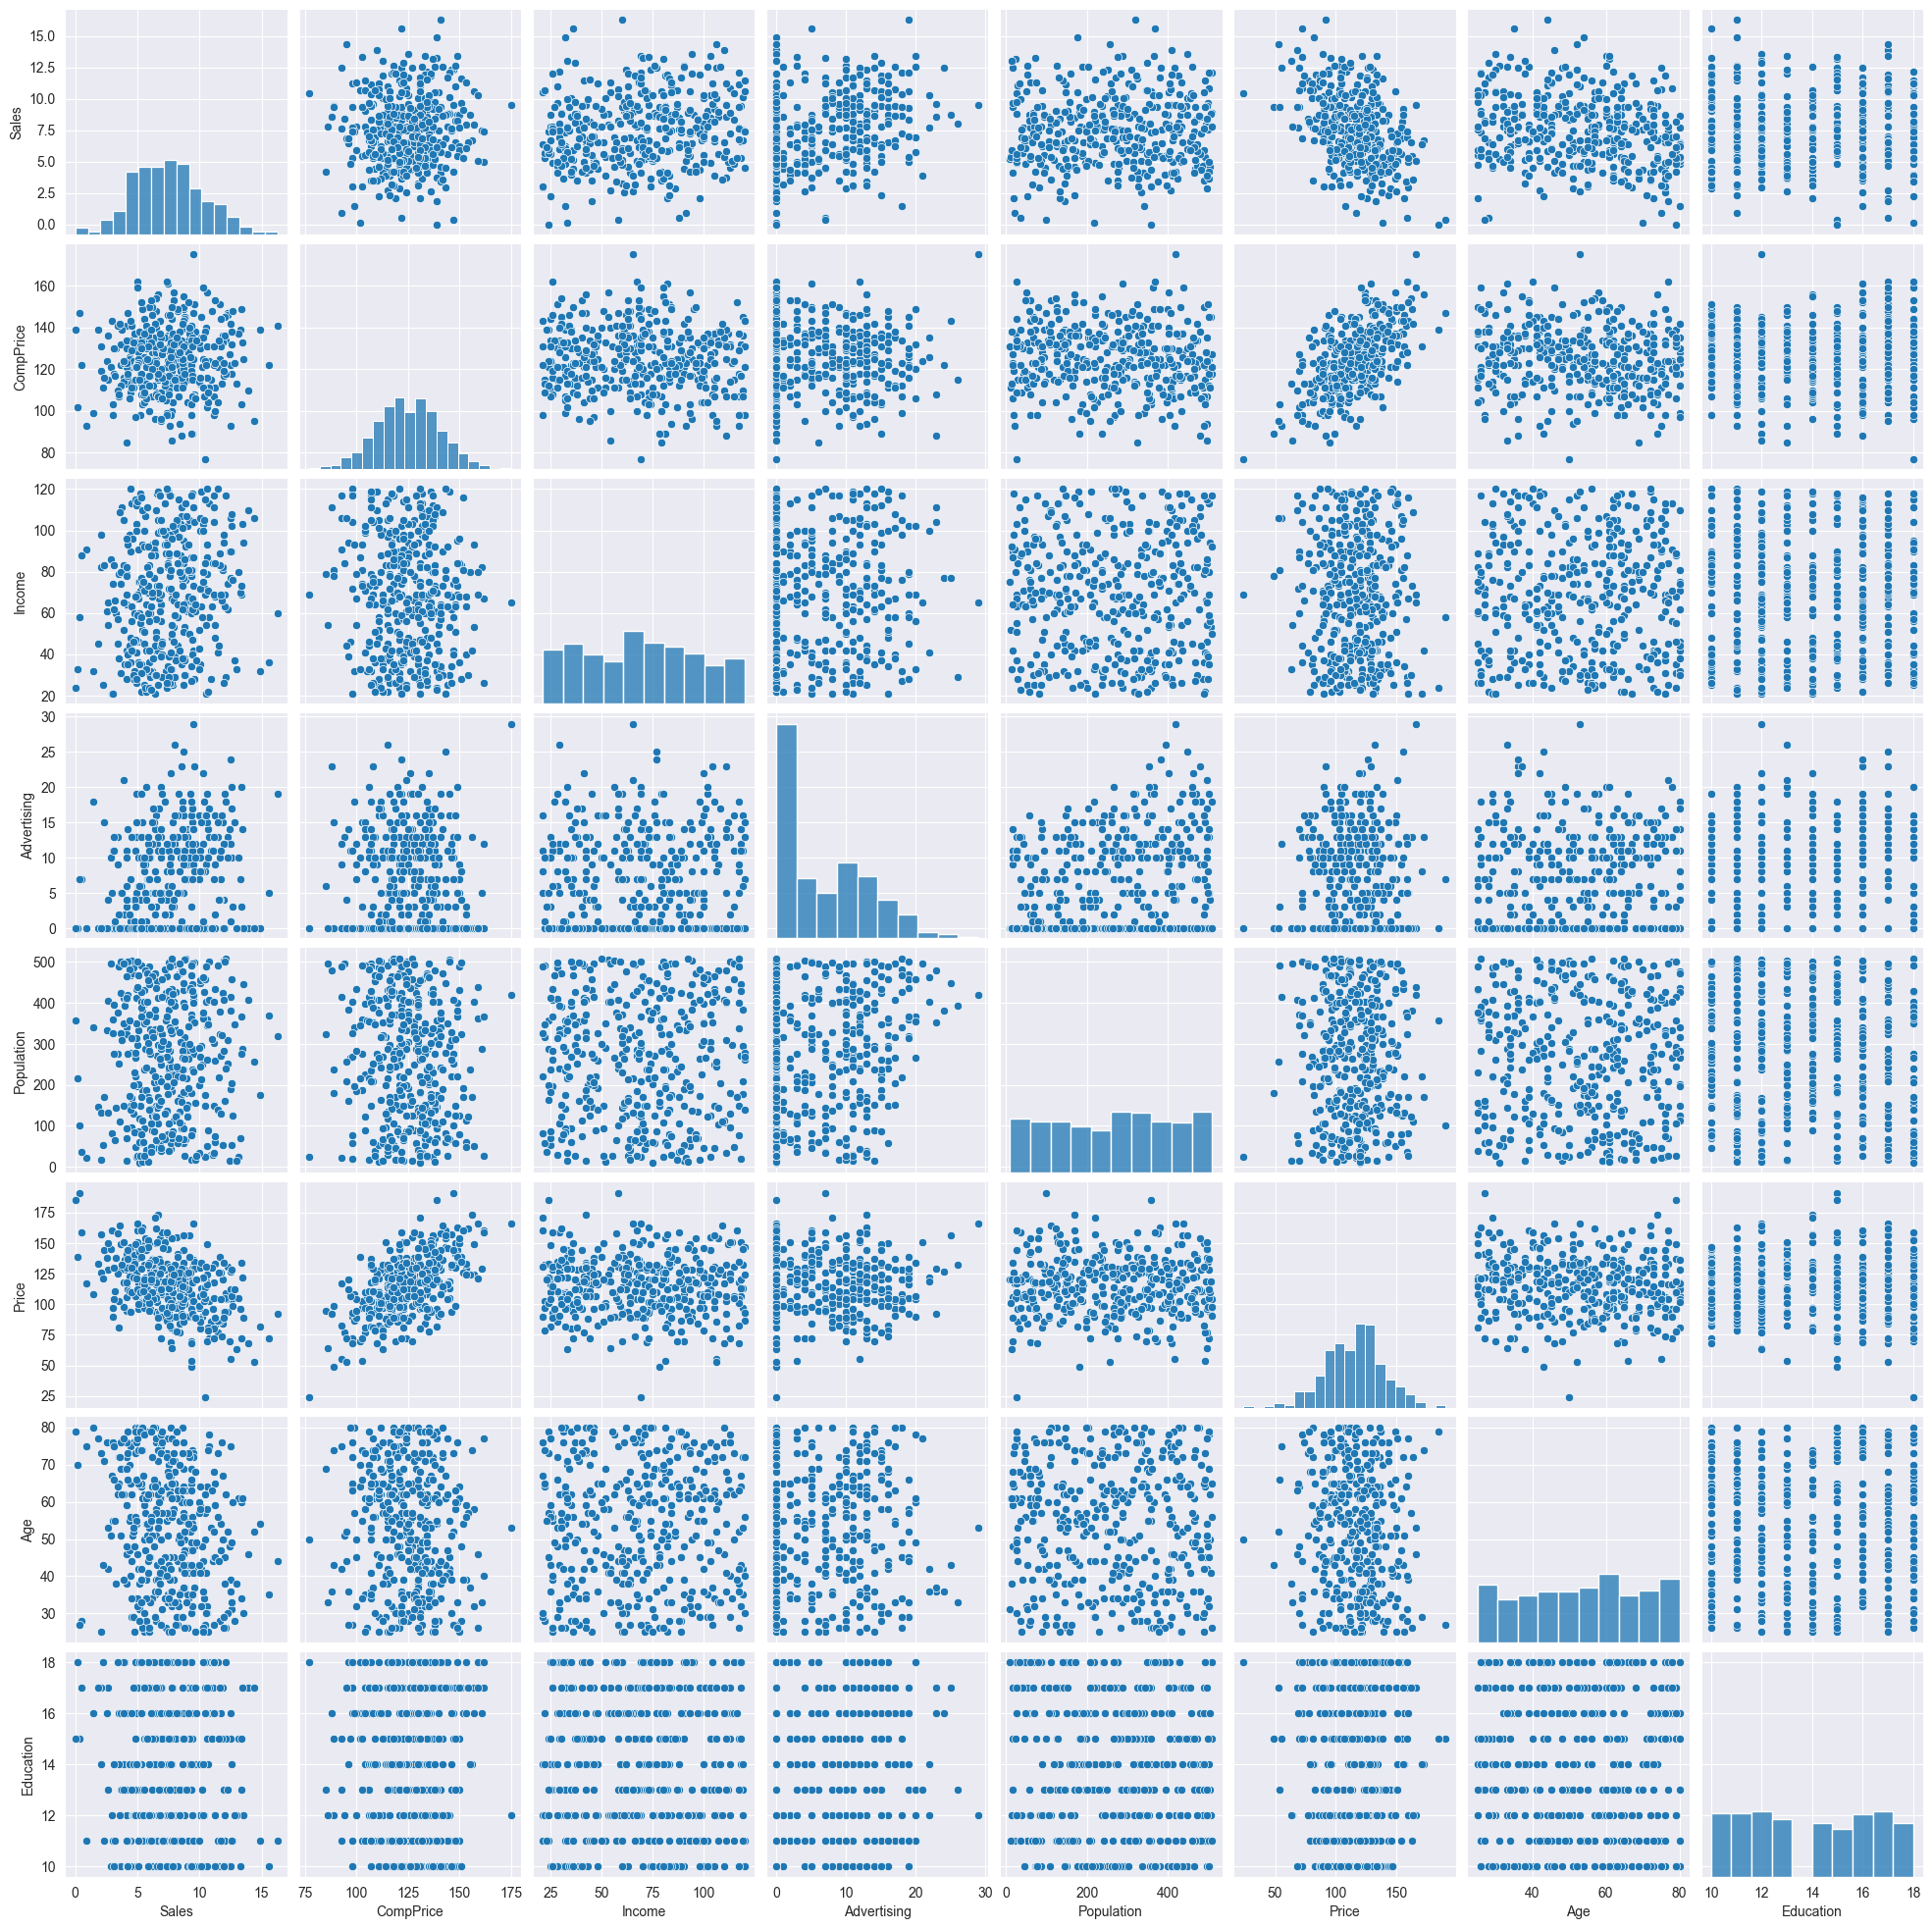

In [176]:
plt.figure(figsize=(12,8))
sns.pairplot(df)
plt.show

In [177]:
df.head(2)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes


In [178]:
df['Urban'] = df['Urban'].apply(lambda x: 1 if x== 'Yes' else 0)

In [179]:
df['US'] = df['US'].apply(lambda x: 1 if x== 'Yes' else 0)

In [180]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1
3,7.40,117,100,4,466,97,Medium,55,14,1,1
4,4.15,141,64,3,340,128,Bad,38,13,1,0


In [181]:
df.Sales.value_counts()

7.80    4
8.77    3
9.32    3
4.10    3
6.20    3
       ..
3.67    1
7.62    1
9.54    1
8.41    1
9.71    1
Name: Sales, Length: 336, dtype: int64

In [182]:
df['ShelveLoc'] = df['ShelveLoc'].map({'Good':1, 'Medium':2, 'Bad': 3})

In [183]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,3,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,3,38,13,1,0


<AxesSubplot:>

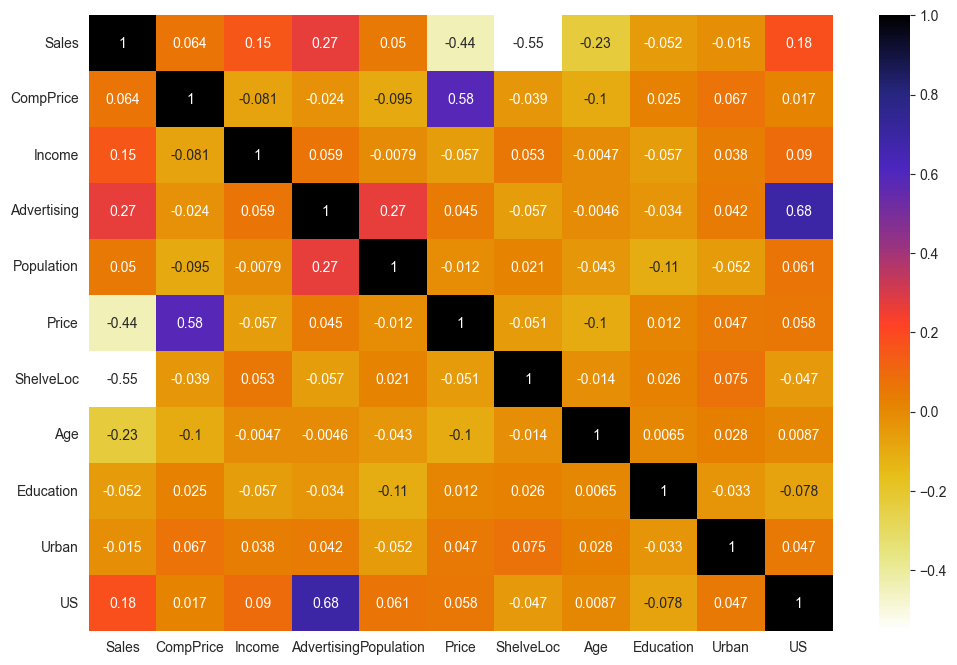

In [184]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap= plt.cm.CMRmap_r)

In [185]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
         for j in range(i):
                if (corr_matrix.iloc[i,j])>threshold:
                    colname = corr_matrix.columns[i]
                    col_corr.add(colname)
    return col_corr

In [186]:
corr = correlation(df, 0.6)
print(f'Название самой коррелированной переменной: {corr}')

Название самой коррелированной переменной: {'US'}


In [187]:
df.drop(corr, axis=1, inplace=True)

In [188]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban
0,9.50,138,73,11,276,120,3,42,17,1
1,11.22,111,48,16,260,83,1,65,10,1
2,10.06,113,35,10,269,80,2,59,12,1
3,7.40,117,100,4,466,97,2,55,14,1
4,4.15,141,64,3,340,128,3,38,13,1


In [189]:
df['Sales'] = df.Sales.astype('category')

In [190]:
train = df.iloc[:, 1:]
test = df.Sales
train.shape

(400, 9)

In [191]:
from sklearn.preprocessing import StandardScaler

In [192]:
sd = StandardScaler()

In [193]:
train_columns = train.columns

In [194]:
train = sd.fit_transform(train)

In [195]:
train = pd.DataFrame(train, columns=train_columns)
train.head(2)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban
0,0.850455,0.155361,0.657177,0.075819,0.177823,1.446917,-0.699782,1.184449,0.646869
1,-0.912484,-0.739060,1.409957,-0.032882,-1.386854,-1.528747,0.721723,-1.490113,0.646869


In [196]:
from sklearn.model_selection import train_test_split

In [197]:
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.20, random_state=0)

In [198]:
from sklearn.ensemble import RandomForestRegressor

In [199]:
model = RandomForestRegressor(n_estimators=50, random_state=42)

In [200]:
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

In [201]:
prid = model.predict(X_test)

In [202]:
random_forest_actual_pridict = pd.DataFrame({'Факт':y_test, 'Предсказание': prid})

In [203]:
random_forest_actual_pridict[:10]

,Факт,Предсказание
132,9.54,7.2622
309,11.18,7.7300
341,7.38,6.6564
196,4.10,3.2376
246,6.90,6.7250
60,8.32,6.7400
155,7.71,8.5648
261,5.71,6.0020
141,6.53,5.6752
214,4.83,6.1812


In [204]:
model.score(X_test,y_test)

0.6792068975951346